In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jinja2

In [165]:
df = pd.read_csv("House_Rent_Dataset.csv")
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [166]:
df1 = df.copy(deep=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [167]:
df1.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

No nulls

In [168]:
df1.nunique()

Posted On              81
BHK                     6
Rent                  243
Size                  615
Floor                 480
Area Type               3
Area Locality        2235
City                    6
Furnishing Status       3
Tenant Preferred        3
Bathroom                8
Point of Contact        3
dtype: int64

In [169]:
df1.shape

(4746, 12)

date

In [170]:
df1['Posted On'] = pd.to_datetime(df1['Posted On'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Posted On          4746 non-null   datetime64[ns]
 1   BHK                4746 non-null   int64         
 2   Rent               4746 non-null   int64         
 3   Size               4746 non-null   int64         
 4   Floor              4746 non-null   object        
 5   Area Type          4746 non-null   object        
 6   Area Locality      4746 non-null   object        
 7   City               4746 non-null   object        
 8   Furnishing Status  4746 non-null   object        
 9   Tenant Preferred   4746 non-null   object        
 10  Bathroom           4746 non-null   int64         
 11  Point of Contact   4746 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 445.1+ KB


In [171]:
df1 = df1.assign(
    posted_year = df1['Posted On'].dt.year,
    posted_month = df1['Posted On'].dt.month,
    posted_date = df1['Posted On'].dt.day,
    posted_day = df1['Posted On'].dt.dayofweek
)
df1.shape

(4746, 16)

In [172]:
df1.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,posted_year,posted_month,posted_date,posted_day
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2022,5,18,2
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,13,4
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,16,0
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2022,7,4,0
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2022,5,9,0


In [173]:
df1.drop(['Posted On'],axis=1,inplace=True)
df1.shape

(4746, 15)

In [174]:
df1.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,posted_year,posted_month,posted_date,posted_day
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2022,5,18,2
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,13,4
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,16,0
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2022,7,4,0
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2022,5,9,0


Floor

In [175]:
df1['Flat_Floor'] = df1['Floor'].apply(lambda x: x.split(" out of ")[0])
df1['Flat_Total_Floor'] = df1['Floor'].apply(lambda x: x.split(" ")[-1])

In [176]:
df1.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,posted_year,posted_month,posted_date,posted_day,Flat_Floor,Flat_Total_Floor
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2022,5,18,2,Ground,2
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,13,4,1,3
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,16,0,1,3
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2022,7,4,0,1,2
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2022,5,9,0,1,2


In [177]:
df1.Flat_Floor.unique()

array(['Ground', '1', '2', '4', '3', '5', '7', '8', 'Upper Basement',
       '11', 'Lower Basement', '6', '14', '43', '13', '18', '17', '9',
       '19', '60', '34', '12', '26', '25', '53', '16', '10', '39', '32',
       '47', '28', '20', '15', '65', '40', '37', '22', '21', '30', '35',
       '33', '44', '41', '46', '27', '45', '48', '50', '24', '23', '29',
       '49', '36', '76'], dtype=object)

In [178]:
df1.Flat_Floor = df1.Flat_Floor.replace('Ground',0)

In [179]:
df1.Flat_Floor = df1.Flat_Floor.replace('Upper Basement',-1)
df1.Flat_Floor = df1.Flat_Floor.replace('Lower Basement',-2)

In [180]:
df1.Flat_Floor.unique()

array([0, '1', '2', '4', '3', '5', '7', '8', -1, '11', -2, '6', '14',
       '43', '13', '18', '17', '9', '19', '60', '34', '12', '26', '25',
       '53', '16', '10', '39', '32', '47', '28', '20', '15', '65', '40',
       '37', '22', '21', '30', '35', '33', '44', '41', '46', '27', '45',
       '48', '50', '24', '23', '29', '49', '36', '76'], dtype=object)

In [181]:
df1.drop('Floor',axis=1,inplace=True)

In [182]:
df1.head()

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,posted_year,posted_month,posted_date,posted_day,Flat_Floor,Flat_Total_Floor
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2022,5,18,2,0,2
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,13,4,1,3
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,16,0,1,3
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2022,7,4,0,1,2
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2022,5,9,0,1,2


In [183]:
df1.drop('Area Locality',axis=1,inplace=True)
df1.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,posted_year,posted_month,posted_date,posted_day,Flat_Floor,Flat_Total_Floor
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2022,5,18,2,0,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,13,4,1,3
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,16,0,1,3
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2022,7,4,0,1,2
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2022,5,9,0,1,2


In [184]:
df1['Area Type'].value_counts()

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64

In [185]:
df1.replace(to_replace=['Built Area'],value=['Super Area'],inplace=True)

In [186]:
df1['Area Type'].value_counts()

Super Area     2448
Carpet Area    2298
Name: Area Type, dtype: int64

In [187]:
df1 = pd.get_dummies(data=df1,columns=['Area Type'],drop_first=True)

In [188]:
df1['Area Type_Super Area'].value_counts()

1    2448
0    2298
Name: Area Type_Super Area, dtype: int64

In [189]:
df1.head(3)

,BHK,Rent,Size,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,posted_year,posted_month,posted_date,posted_day,Flat_Floor,Flat_Total_Floor,Area Type_Super Area
0,2,10000,1100,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2022,5,18,2,0,2,1
1,2,20000,800,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,13,4,1,3,1
2,2,17000,1000,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,16,0,1,3,1


In [190]:
df1['Point of Contact'].value_counts()

Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: Point of Contact, dtype: int64

In [191]:
df1.replace(to_replace=['Contact Builder'],value=['Contact Owner'],inplace=True)

In [192]:
df1['Point of Contact'].value_counts()

Contact Owner    3217
Contact Agent    1529
Name: Point of Contact, dtype: int64

In [193]:
df1.City.value_counts()

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

In [194]:
df1['Furnishing Status'].value_counts()

Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: Furnishing Status, dtype: int64

In [195]:
df1['Tenant Preferred'].value_counts()

Bachelors/Family    3444
Bachelors            830
Family               472
Name: Tenant Preferred, dtype: int64

In [196]:
df1.shape

(4746, 15)

Now, generating dummy variables

In [197]:
df1 = pd.get_dummies(data=df1, columns=['Point of Contact','City','Furnishing Status','Tenant Preferred'],drop_first=True)
df1.shape

(4746, 21)

In [198]:
df1.head()

,BHK,Rent,Size,Bathroom,posted_year,posted_month,posted_date,posted_day,Flat_Floor,Flat_Total_Floor,...,Point of Contact_Contact Owner,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
0,2,10000,1100,2,2022,5,18,2,0,2,...,1,0,0,0,1,0,0,1,1,0
1,2,20000,800,1,2022,5,13,4,1,3,...,1,0,0,0,1,0,1,0,1,0
2,2,17000,1000,1,2022,5,16,0,1,3,...,1,0,0,0,1,0,1,0,1,0
3,2,10000,800,1,2022,7,4,0,1,2,...,1,0,0,0,1,0,0,1,1,0
4,2,7500,850,1,2022,5,9,0,1,2,...,1,0,0,0,1,0,0,1,0,0


In [199]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   BHK                                4746 non-null   int64 
 1   Rent                               4746 non-null   int64 
 2   Size                               4746 non-null   int64 
 3   Bathroom                           4746 non-null   int64 
 4   posted_year                        4746 non-null   int64 
 5   posted_month                       4746 non-null   int64 
 6   posted_date                        4746 non-null   int64 
 7   posted_day                         4746 non-null   int64 
 8   Flat_Floor                         4746 non-null   object
 9   Flat_Total_Floor                   4746 non-null   object
 10  Area Type_Super Area               4746 non-null   uint8 
 11  Point of Contact_Contact Owner     4746 non-null   uint8 
 12  City_C

In [200]:
df1.Flat_Floor = pd.to_numeric(df1.Flat_Floor)

In [201]:
df1.Flat_Total_Floor.value_counts()

4         938
3         915
2         868
5         422
1         335
         ... 
39          1
62          1
59          1
66          1
Ground      1
Name: Flat_Total_Floor, Length: 67, dtype: int64

In [202]:
df1.Flat_Total_Floor.replace('Ground',0,inplace=True)

In [203]:
df1.Flat_Total_Floor = pd.to_numeric(df1.Flat_Total_Floor)

In [204]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   BHK                                4746 non-null   int64
 1   Rent                               4746 non-null   int64
 2   Size                               4746 non-null   int64
 3   Bathroom                           4746 non-null   int64
 4   posted_year                        4746 non-null   int64
 5   posted_month                       4746 non-null   int64
 6   posted_date                        4746 non-null   int64
 7   posted_day                         4746 non-null   int64
 8   Flat_Floor                         4746 non-null   int64
 9   Flat_Total_Floor                   4746 non-null   int64
 10  Area Type_Super Area               4746 non-null   uint8
 11  Point of Contact_Contact Owner     4746 non-null   uint8
 12  City_Chennai        

Adding more explainability

In [205]:
df1.shape

(4746, 21)

Datatypes perfect! Now beginning visualisation!

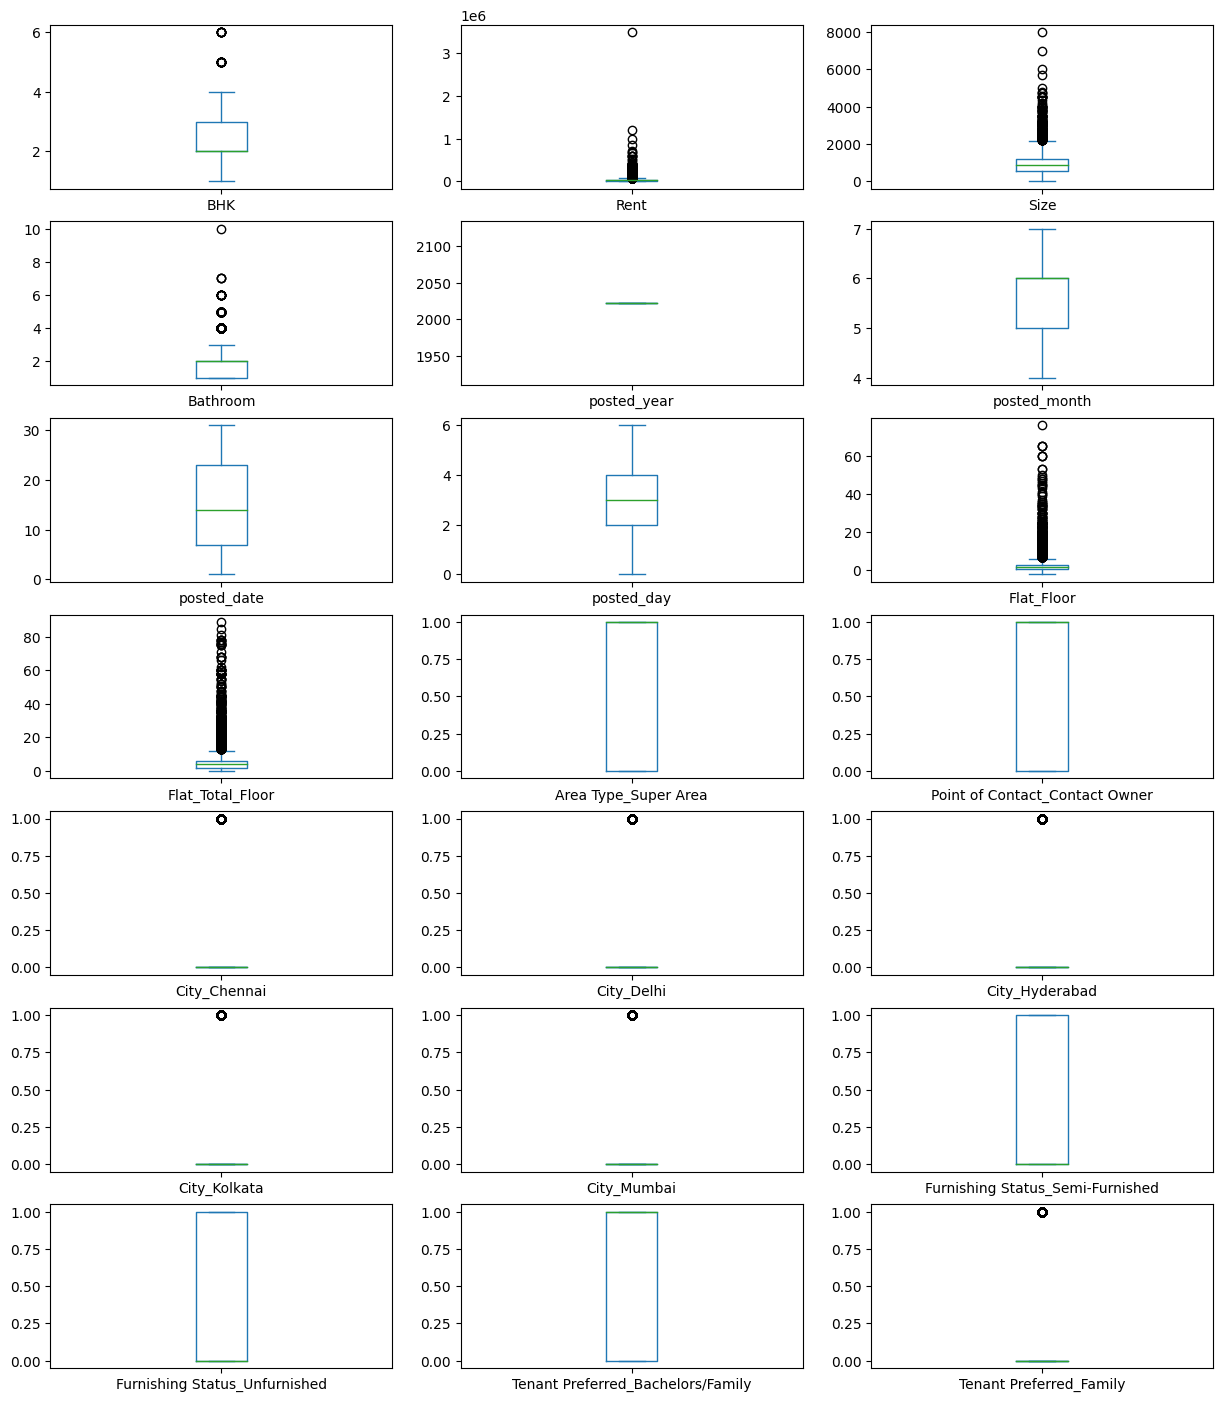

In [206]:
df1.plot(kind = "box",subplots = True,layout = (8,3),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

In [207]:
#Using the InterQuartile Range to fill the values
def remove_outlier(i , col):
    Q1 = i[col].quantile(0.25)
    Q3 = i[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df1[col] = np.clip(i[col] , lower_whisker , upper_whisker)
    return i

def treat_outliers_all(df , col_list):
    for c in col_list:
        i = remove_outlier(df , c)
    return i

In [208]:
rem_list = ['BHK', 'Rent','Size','Bathroom','Flat_Floor','Flat_Total_Floor']

In [209]:
df1 = treat_outliers_all(df1 , rem_list)

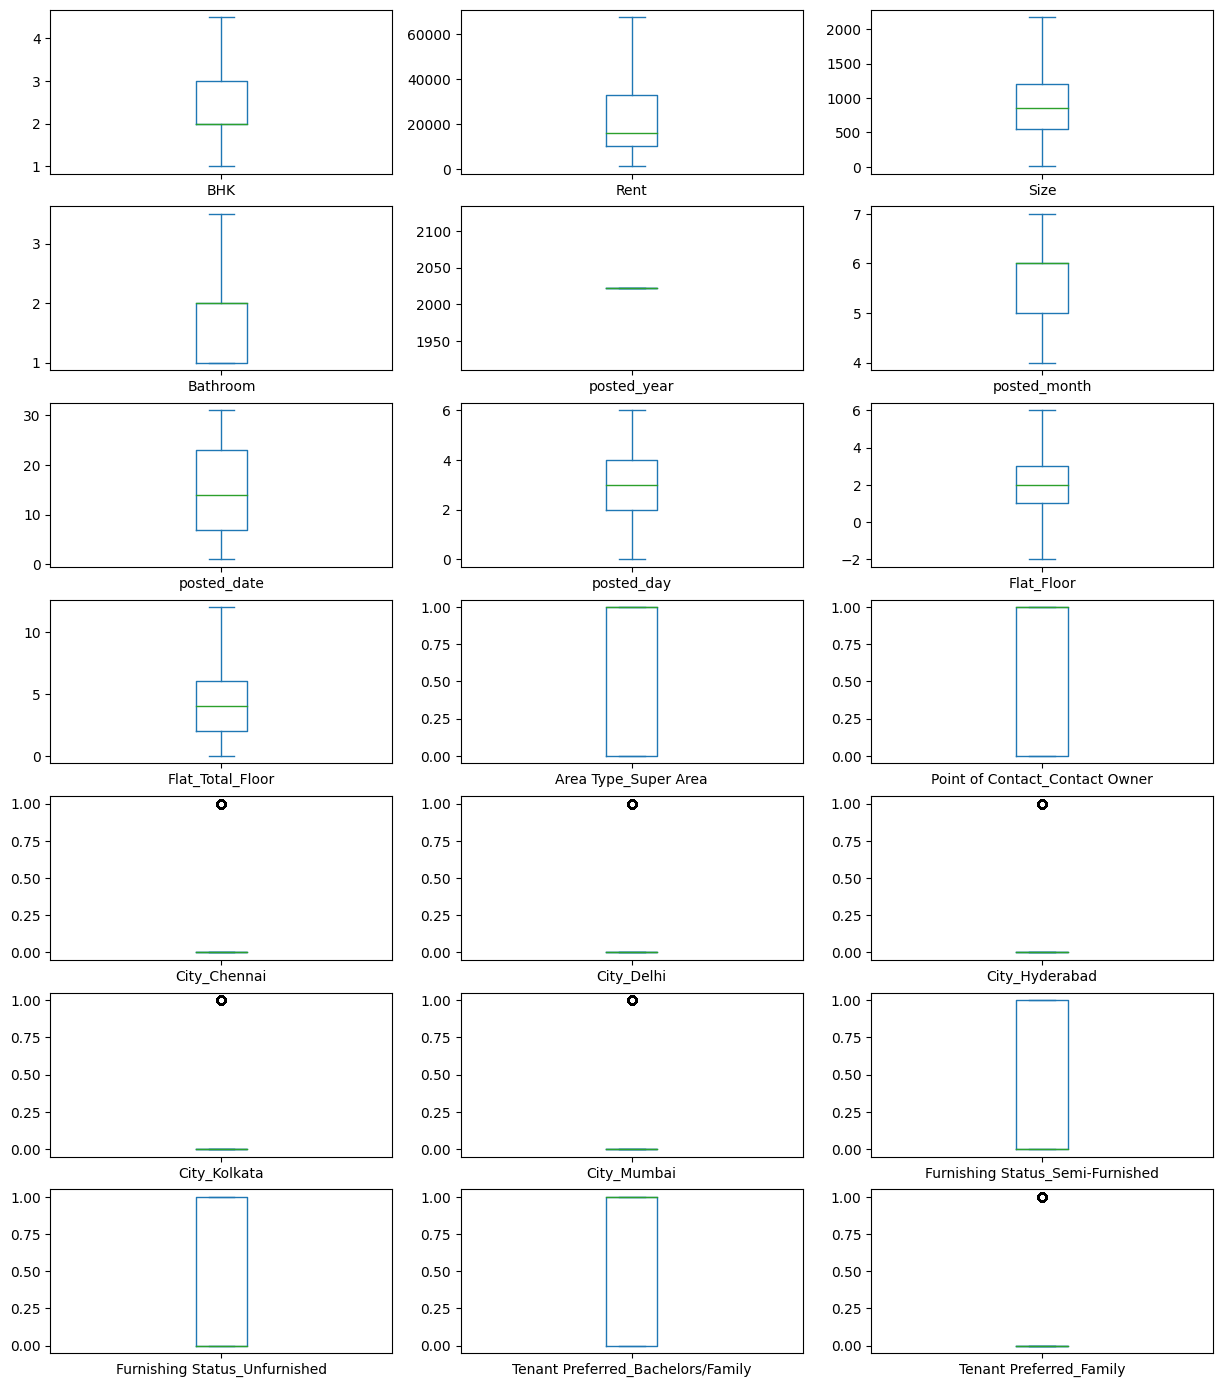

In [210]:
df1.plot(kind = "box",subplots = True,layout = (8,3),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

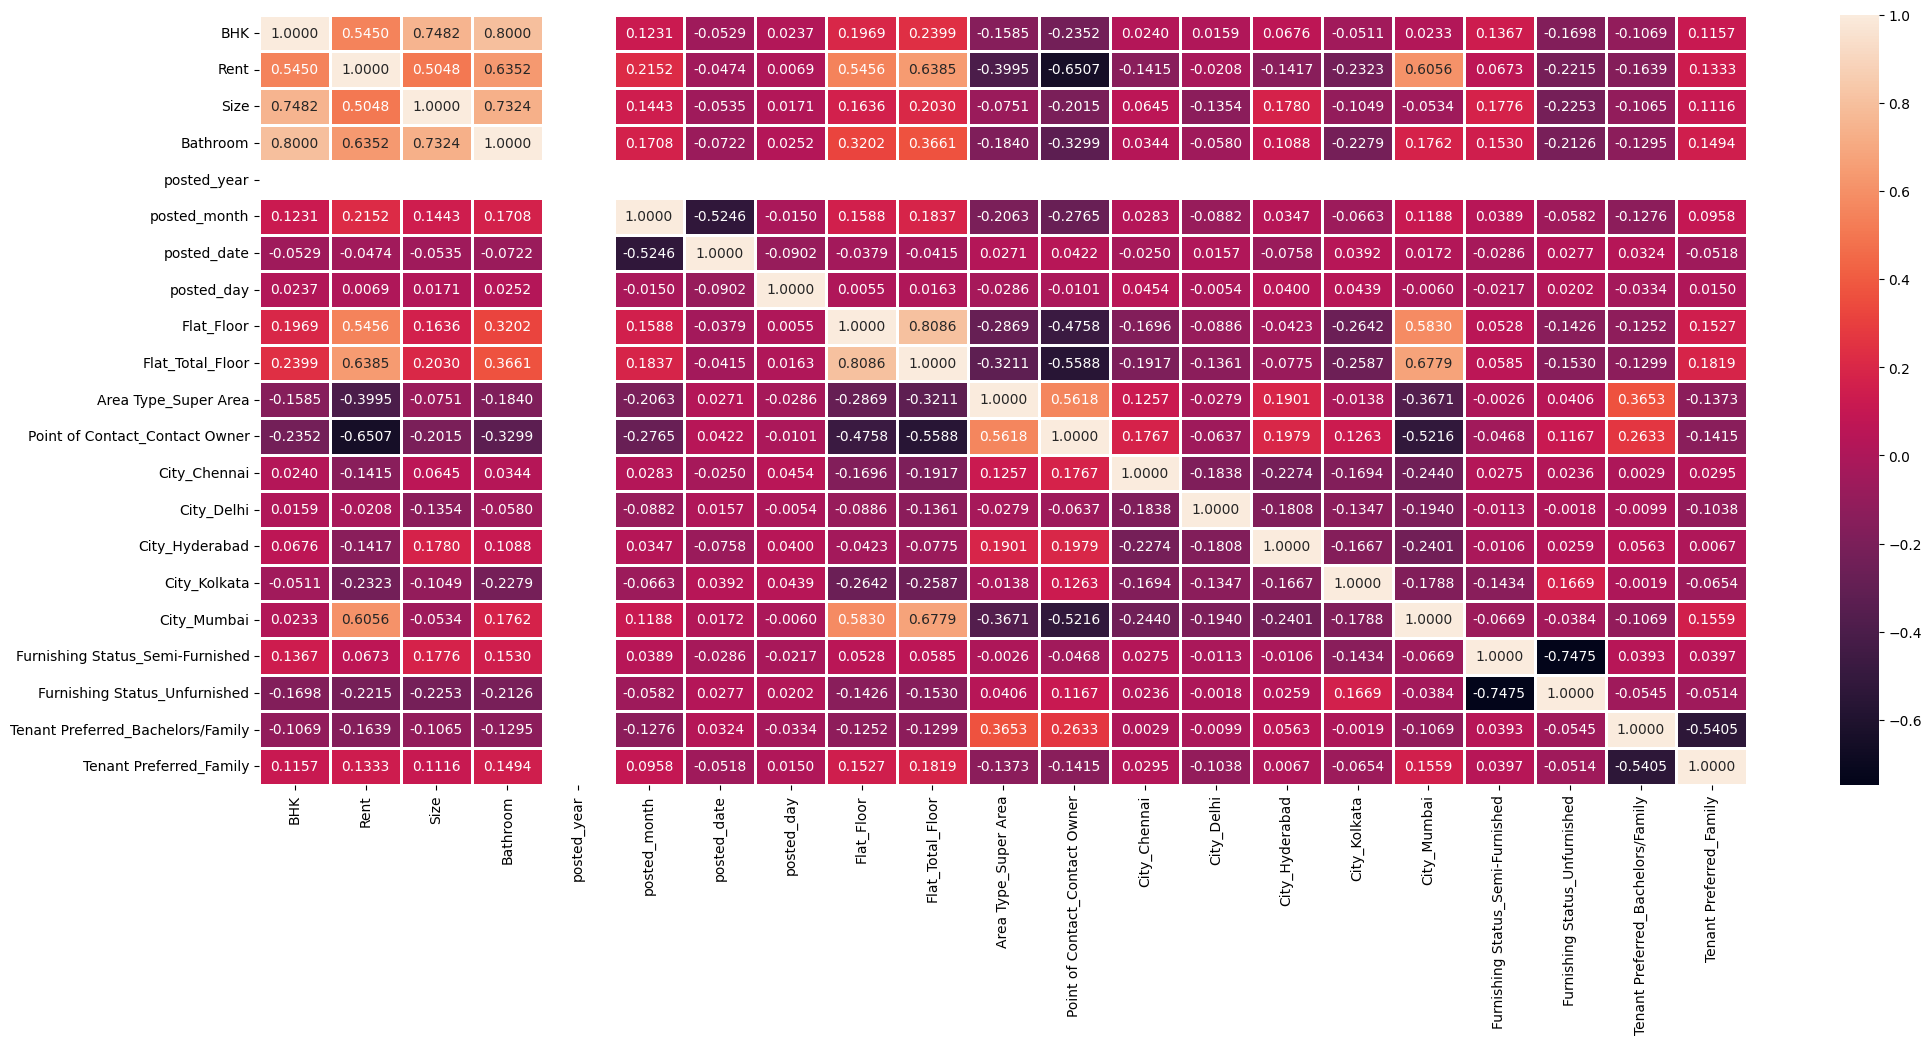

In [211]:
plt.figure(figsize=(24,10))
sns.heatmap(df1.corr(),annot=True,fmt='.4f',linewidths=2)
plt.show()

array([[<AxesSubplot: title={'center': 'BHK'}>,
        <AxesSubplot: title={'center': 'Rent'}>,
        <AxesSubplot: title={'center': 'Size'}>,
        <AxesSubplot: title={'center': 'Bathroom'}>,
        <AxesSubplot: title={'center': 'posted_year'}>],
       [<AxesSubplot: title={'center': 'posted_month'}>,
        <AxesSubplot: title={'center': 'posted_date'}>,
        <AxesSubplot: title={'center': 'posted_day'}>,
        <AxesSubplot: title={'center': 'Flat_Floor'}>,
        <AxesSubplot: title={'center': 'Flat_Total_Floor'}>],
       [<AxesSubplot: title={'center': 'Area Type_Super Area'}>,
        <AxesSubplot: title={'center': 'Point of Contact_Contact Owner'}>,
        <AxesSubplot: title={'center': 'City_Chennai'}>,
        <AxesSubplot: title={'center': 'City_Delhi'}>,
        <AxesSubplot: title={'center': 'City_Hyderabad'}>],
       [<AxesSubplot: title={'center': 'City_Kolkata'}>,
        <AxesSubplot: title={'center': 'City_Mumbai'}>,
        <AxesSubplot: title={'cent

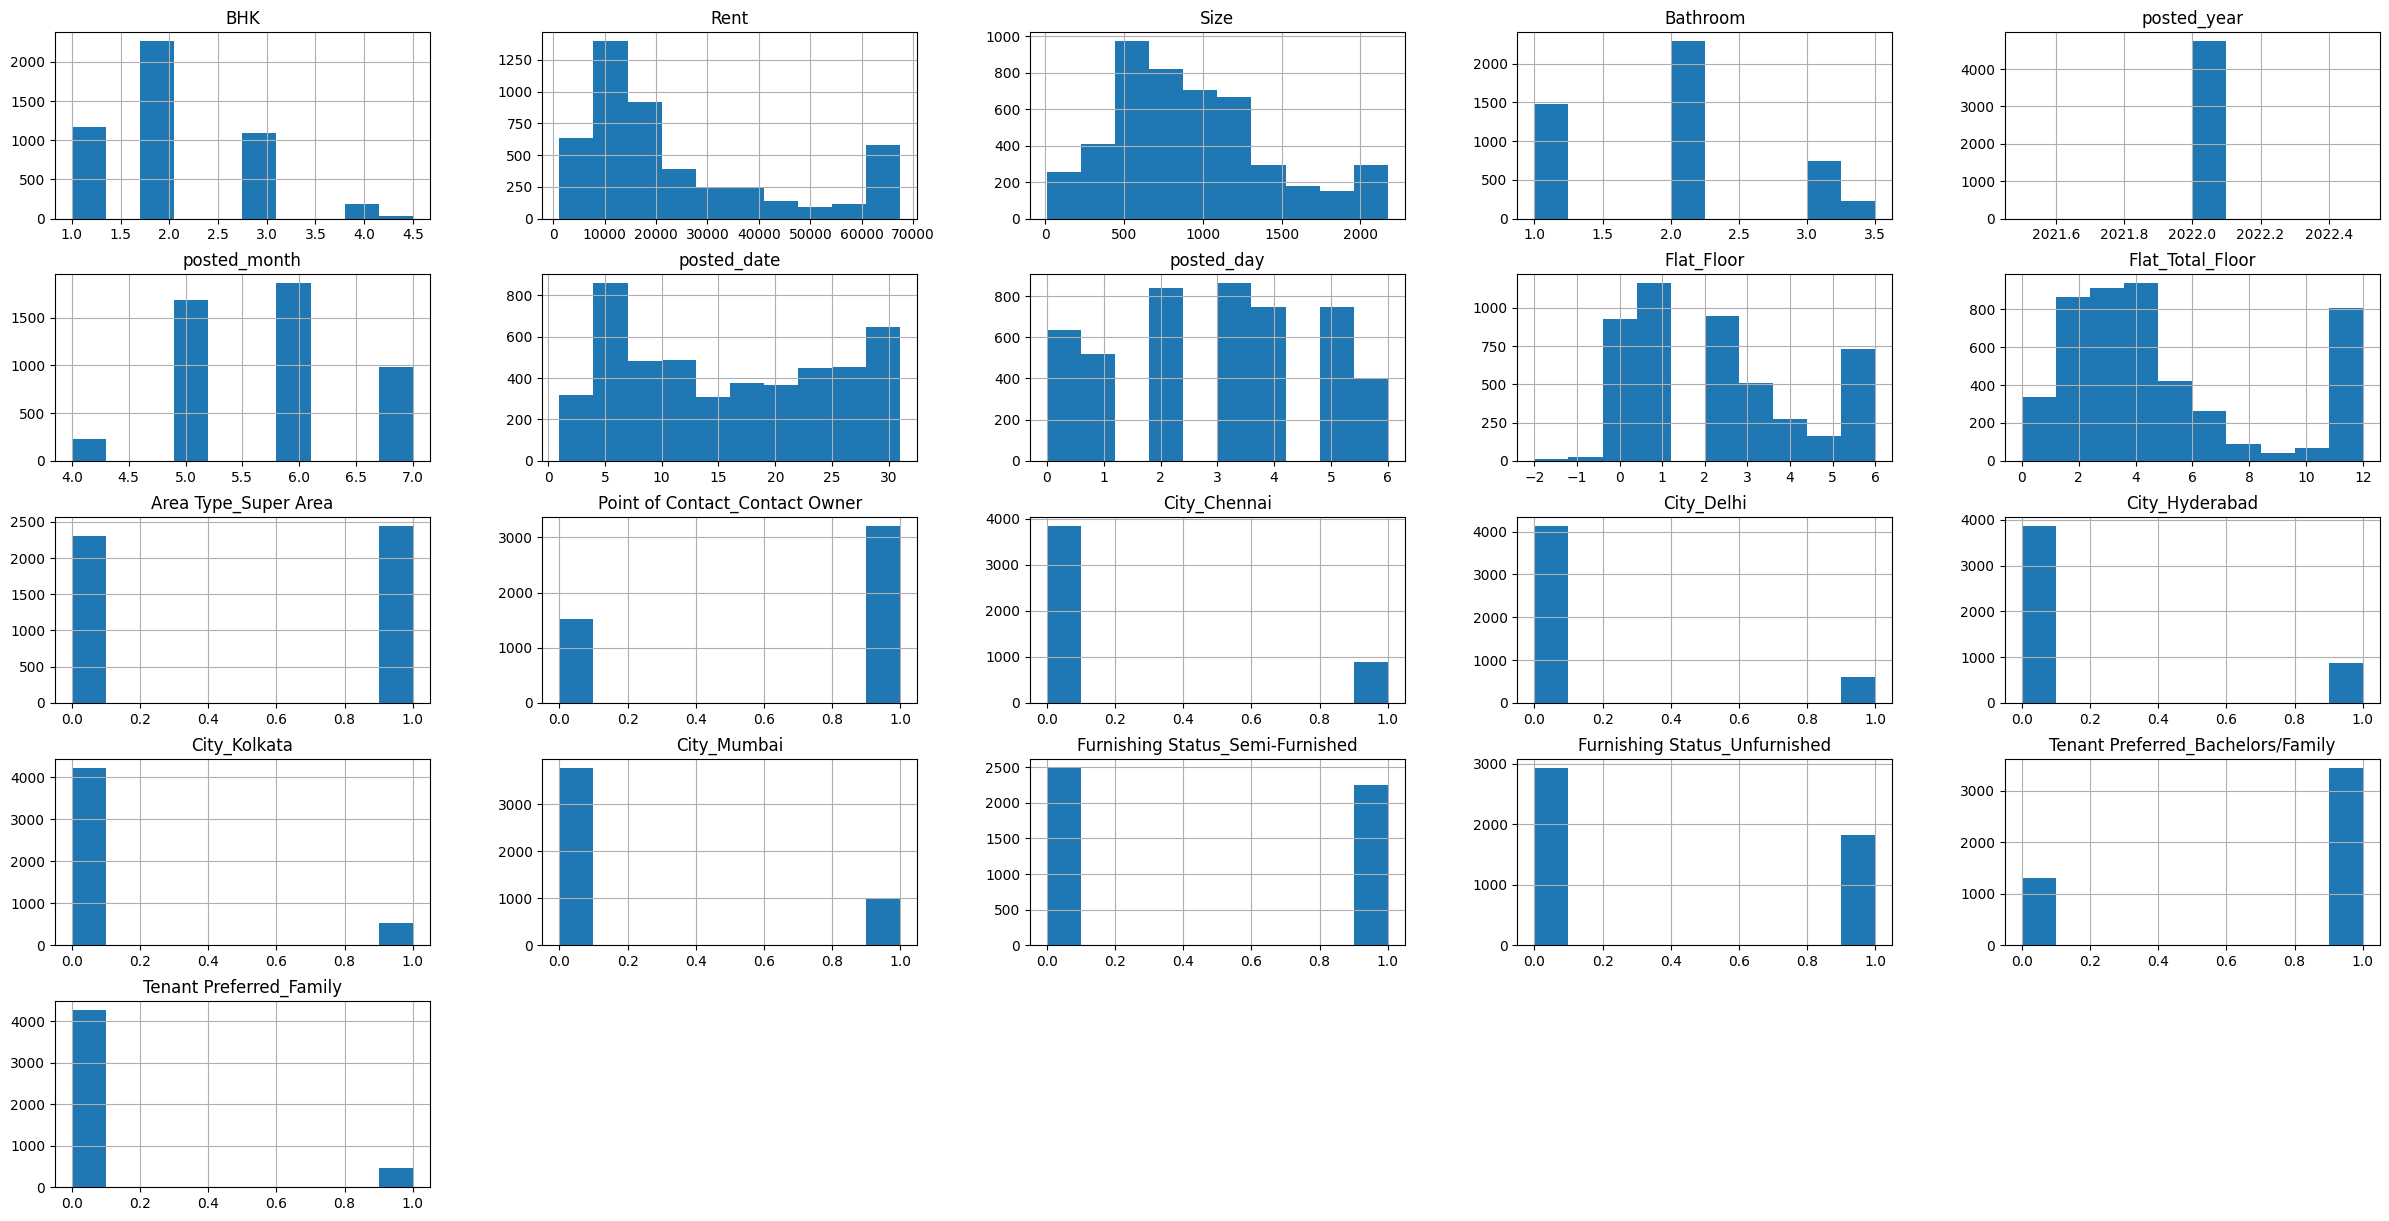

In [213]:
df1.hist(figsize=(30,15))

Feature Engineering

In [212]:
X = df1.drop('Rent',axis=1)
y = df1.Rent
X.shape, y.shape

((4746, 20), (4746,))

In [214]:
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3796, 20), (950, 20), (3796,), (950,))

In [215]:
from sklearn.linear_model import LinearRegression

# initialize the linear regression model
reg = LinearRegression()

# Train the model with our training data
reg.fit(X_train, y_train)

LinearRegression()

In [216]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [217]:
y_pred_lin = reg.predict(X_test)

In [218]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_ln = mean_absolute_error(y_test,y_pred_lin)
rmse_ln = sqrt(mean_squared_error(y_test,y_pred_lin))
r_sq_ln = r2_score(y_test,y_pred_lin)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_ln,3),round(rmse_ln,3),round(r_sq_ln,3)))

Mean Absolute Error: 6607.41
Root Mean Square Error: 8825.459
R2 Score: 0.799


Random Forests

In [219]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
scaler = MinMaxScaler()
X_train_RF = scaler.fit_transform(X_train)
X_test_RF = scaler.transform(X_test)

X_train_RF = pd.DataFrame(X_train_RF,columns=cols)
X_test_RF = pd.DataFrame(X_test_RF,columns=cols)

In [220]:
X_train_RF.shape, X_test_RF.shape

((3796, 20), (950, 20))

In [221]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train_RF,y_train)

RandomForestRegressor(n_estimators=10)

In [222]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [223]:
y_pred_RF = rf.predict(X_test_RF)

In [224]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_rf = mean_absolute_error(y_test,y_pred_RF)
rmse_rf = sqrt(mean_squared_error(y_test,y_pred_RF))
r_sq_rf = r2_score(y_test,y_pred_RF)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_rf,3),round(rmse_rf,3),round(r_sq_rf,3)))

Mean Absolute Error: 5239.315
Root Mean Square Error: 7908.565
R2 Score: 0.839


With 100 trees

In [225]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_RF,y_train)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [226]:
y_pred_RF_100 = rf.predict(X_test_RF)
# print(y_pred_RF_100)

In [227]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_rf100 = mean_absolute_error(y_test,y_pred_RF_100)
rmse_rf100 = sqrt(mean_squared_error(y_test,y_pred_RF_100))
r_sq_rf100 = r2_score(y_test,y_pred_RF_100)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_rf100,3),round(rmse_rf100,3),round(r_sq_rf100,3)))

Mean Absolute Error: 5072.915
Root Mean Square Error: 7534.779
R2 Score: 0.854


CNN

In [228]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold, train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf

In [229]:
rent_model = Sequential()
rent_model.add(Dense(256, input_shape = (X_train_RF.shape[1],), activation = "relu"))
rent_model.add(Dense(512, activation = "relu"))
rent_model.add(Dense(1024, activation = "relu"))
rent_model.add(Dropout(0.2))
rent_model.add(Dense(1024, activation = "relu"))
rent_model.add(Dense(512, activation = "relu"))
rent_model.add(Dense(256, activation = "relu"))
rent_model.add(Flatten())
rent_model.add(Dense(512, activation = "relu"))
rent_model.add(Dropout(0.5))
rent_model.add(Dense(512, activation = "relu"))
rent_model.add(Dropout(0.5))
rent_model.add(Dense(1, activation = "linear",kernel_regularizer = tf.keras.regularizers.l1(l=0.001)))
rent_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5376      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 256)               1

In [230]:
optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Compile the network :
rent_model.compile(optimizer=optimizer, loss=tf.keras.losses.MAE, metrics=[tf.keras.metrics.MAE])

In [231]:
m_loss = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=15,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [232]:
save_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='rent_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

In [239]:
history=rent_model.fit(X_train_RF, y_train, epochs=100,validation_split=0.2, batch_size=128, verbose=1,callbacks=[m_loss,save_checkpoint])

Epoch 1/100
 4/24 [====>.........................] - ETA: 0s - loss: 5249.4795 - mean_absolute_error: 5249.4619

c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1508: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


11/24 [============>.................] - ETA: 0s - loss: 5118.3174 - mean_absolute_error: 5118.2993
Epoch 1: val_loss did not improve from 5397.53223
24/24 [==============================] - 0s 17ms/step - loss: 5099.9009 - mean_absolute_error: 5099.8833 - val_loss: 5609.7969 - val_mean_absolute_error: 5609.7788
Epoch 2/100
16/24 [===================>..........] - ETA: 0s - loss: 4995.9155 - mean_absolute_error: 4995.8970
Epoch 2: val_loss did not improve from 5397.53223
24/24 [==============================] - 0s 5ms/step - loss: 5053.9771 - mean_absolute_error: 5053.9585 - val_loss: 5630.9966 - val_mean_absolute_error: 5630.9795
Epoch 3/100
17/24 [====================>.........] - ETA: 0s - loss: 5050.6699 - mean_absolute_error: 5050.6523
Epoch 3: val_loss did not improve from 5397.53223
24/24 [==============================] - 0s 5ms/step - loss: 5034.8667 - mean_absolute_error: 5034.8491 - val_loss: 5591.2070 - val_mean_absolute_error: 5591.1895
Epoch 4/100
18/24 [=================

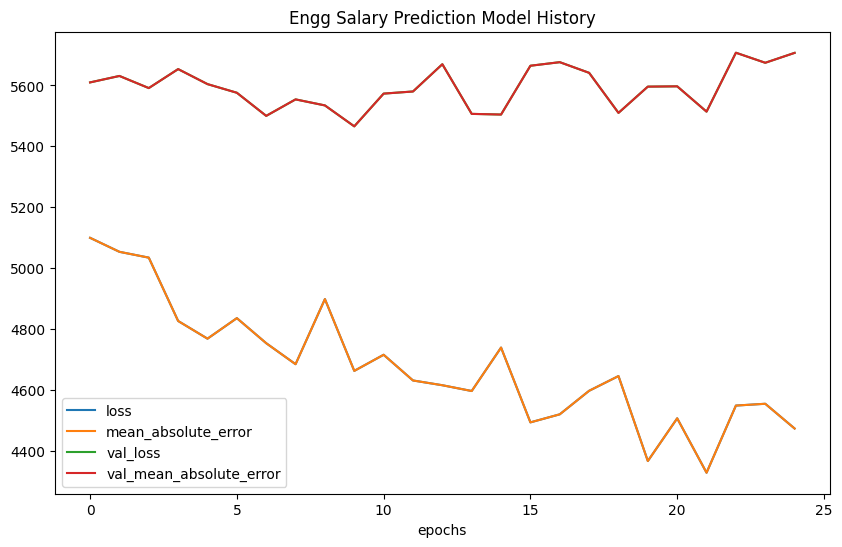

In [240]:
dfh = pd.DataFrame(history.history)
plt.figure(figsize=(10, 6))
plt.title('Engg Salary Prediction Model History')
plt.plot(dfh)
plt.xlabel('epochs')
plt.legend(dfh.columns)
plt.show()

In [241]:
y_pred_cnn = rent_model.predict(X_test_RF)
# print(y_pred_cnn)

30/30 [==============================] - 0s 3ms/step


In [242]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_cnn = mean_absolute_error(y_test,y_pred_cnn)
rmse_cnn = sqrt(mean_squared_error(y_test,y_pred_cnn))
r_sq_cnn = r2_score(y_test,y_pred_cnn)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_cnn,3),round(rmse_cnn,3),round(r_sq_cnn,3)))

Mean Absolute Error: 5295.487
Root Mean Square Error: 8153.994
R2 Score: 0.828


In [243]:
linear_reg_results =  pd.Series({ "MAE": mae_ln, "RMSE": rmse_ln, "R-Square": r_sq_ln }, name="Linear Regression")
rf_10_results = pd.Series({ "MAE": mae_rf, "RMSE": rmse_rf, "R-Square": r_sq_rf }, name="Random Forest-10")
rf_100_results = pd.Series({ "MAE": mae_rf100, "RMSE": rmse_rf100, "R-Square": r_sq_rf100 }, name="Random Forest-100")
cnn_results = pd.Series({ "MAE": mae_cnn, "RMSE": rmse_cnn, "R-Square": r_sq_cnn }, name="CNN")


results = pd.DataFrame([linear_reg_results, rf_10_results, rf_100_results, cnn_results])
results.round(3)

,MAE,RMSE,R-Square
Linear Regression,6607.410,8825.459,0.799
Random Forest-10,5239.315,7908.565,0.839
Random Forest-100,5072.915,7534.779,0.854
CNN,5295.487,8153.994,0.828


Random Forest Best!